# Principal component analysis (PCA)

by: Andrés M. Castillo

__Universidad del Valle__

__2019__


## Introduction

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

PCA was invented in 1901 by Karl Pearson,[1] as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by Harold Hotelling in the 1930s.[2] Depending on the field of application, it is also named the discrete Karhunen–Loève transform (KLT) in signal processing, the Hotelling transform in multivariate quality control, proper orthogonal decomposition (POD) in mechanical engineering, singular value decomposition (SVD) of X (Golub and Van Loan, 1983), eigenvalue decomposition (EVD) of XTX in linear algebra, factor analysis (for a discussion of the differences between PCA and factor analysis see Ch. 7 of Jolliffe's Principal Component Analysis),[3] Eckart–Young theorem (Harman, 1960), or empirical orthogonal functions (EOF) in meteorological science, empirical eigenfunction decomposition (Sirovich, 1987), empirical component analysis (Lorenz, 1956), quasiharmonic modes (Brooks et al., 1988), spectral decomposition in noise and vibration, and empirical modal analysis in structural dynamics.

<img src=GaussianScatterPCA.svg>

Source: https://en.wikipedia.org/wiki/Principal_component_analysis


In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import math

To start lets consider a pair of random variables x, y. Lets start considering the base case when y = n * x. It is clear that x and y will be perfectly correlated to each other since y is just a scaling of x.

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


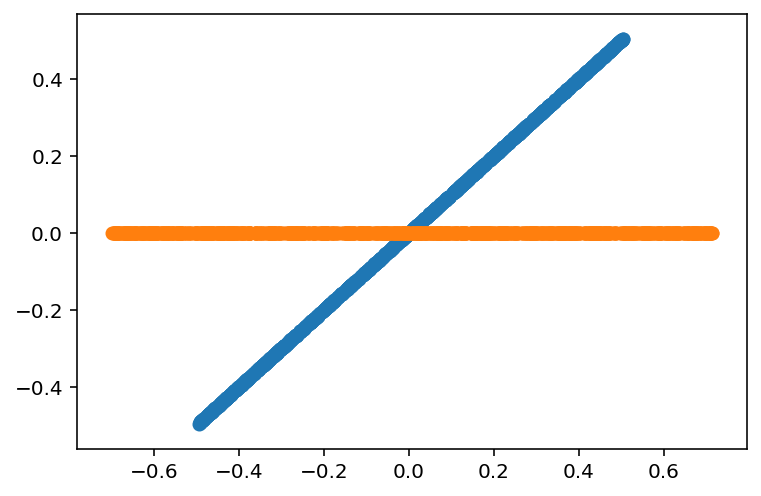

In [3]:
n = 1
x = np.random.uniform(1,2,1000)
y = x.copy() * n

# PCA works better if the data is centered
x = x - np.mean(x)
y = y - np.mean(y)

data = pd.DataFrame({'x': x, 'y': y})
plt.scatter(data.x, data.y)

pca = PCA(n_components=2)
pcaTr = pca.fit(data)
dataPCA = pd.DataFrame(data = pcaTr.transform(data), columns = ['PC1', 'PC2'])

print(pca.components_.T)

plt.scatter(dataPCA.PC1, dataPCA.PC2)

Now, what is the direction in which the set of points are pointing the most?

## Undestanding the transformation model pcaTr

In [4]:
# First Eigen Vector
print('Eigen vectors or principal component: First row must be in the direction of [1, n]')
print(pca.components_)

# First Eigen Value
print('Eigen values or explained variance')
print(pca.explained_variance_)


Eigen vectors or principal component: First row must be in the direction of [1, n]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigen values or explained variance
[1.68140725e-01 2.32961022e-32]


## Now lets introduce random variations to our correlated variables

Now, we will use a controlled dataset composed of 2 random variables with different variances and with a certain covariance amogh them. The only way I know to get such a dataset
is, first, create 2 independent random normal variables with the desired variances, and then combine them using a rotation matrix. In this way the new resulting variables will be a linear combination of the original random variables and thus be dependent and correlated.

angle:  -45.0
det:  1.0
rotationMatrix  [[0.7071067811865476, 0.7071067811865475], [-0.7071067811865475, 0.7071067811865476]]
x   -0.524193
y    0.231268
Name: 0, dtype: float64
x   -0.534192
y   -0.207130
Name: 0, dtype: float64
Eigen vectors or principal component: First row must be in the direction of [1, n]
[[ 0.70515614  0.70905206]
 [ 0.70905206 -0.70515614]]
Eigen values or explained variance
[0.95907773 0.10614447]


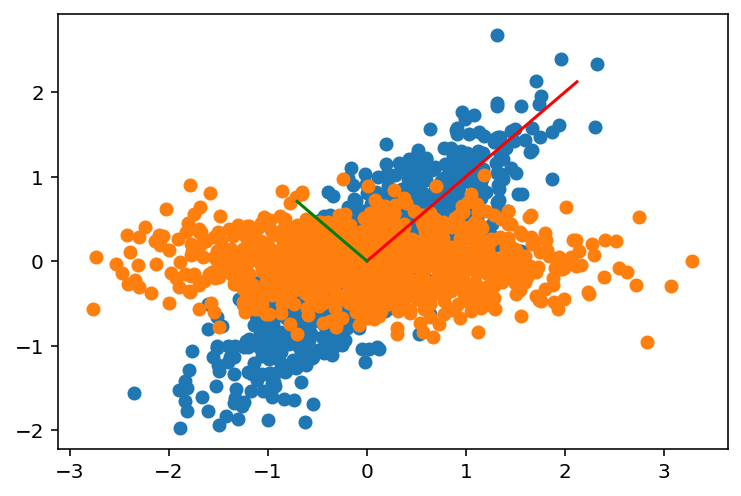

In [10]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

std1 = 1
std2 = 0.333

x = np.random.normal(0,std1,1000)
y = np.random.normal(0,std2,1000)
#y = y + np.random.normal(0,1,1000)*noiseLevel * np.sin(0.78)

# PCA works better if the data is centered
x = x - np.mean(x)
y = y - np.mean(y)

#Define a pair of dependent variables with a desired amount of covariance
n = 1 # Magnitude of covariance
angle = -np.arctan(1/n)
print('angle: ',  angle * 180 /math.pi)
rotationMatrix = [[np.cos(angle), -np.sin(angle)],
                 [np.sin(angle), np.cos(angle)]]

detRot = np.linalg.det(rotationMatrix)
print('det: ', detRot)
print('rotationMatrix ', rotationMatrix)
data = pd.DataFrame({'x': x, 'y': y})

print(data.iloc[0,:])
#plt.scatter(data.x, data.y)
# Rotation operation.
data = data.dot(rotationMatrix)
data.columns = ['x', 'y']
print(data.iloc[0,:])

plt.scatter(data.x, data.y)


# Apply PCA. In theory, the Eigen Vector matrix must be the inverse of the original rotationMatrix. 
pca = PCA(n_components=2)
pcaTr = pca.fit(data)
dataPCA = pd.DataFrame(data = pcaTr.transform(data), columns = ['PC1', 'PC2'])
# First Eigen Vector
print('Eigen vectors or principal component: First row must be in the direction of [1, n]')
print(pca.components_)

# First Eigen Value
print('Eigen values or explained variance')
print(pca.explained_variance_)

plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.plot([0, rotationMatrix[0][0] * std1*3], [0, rotationMatrix[0][1] * std1*3], 'k-', color='red')
plt.plot([0, rotationMatrix[1][0] * std2*3], [0, rotationMatrix[1][1] * std2*3], 'k-', color='green')

plt.show()

## PCA as an strategy to reduce the dimensionality

The principal components contained in the rotation matrix, are decreasingly sorted depending on its explained variance. It usually means that the first components retains most of the power of the data to explain the pattenrs that generalize the data. Nevertheless, for some applications, we are really interested in the patters that explain much less variance. For example in novelty detection. In the figure we can see the original data, and its corresponding proyection over the first and second principal component.

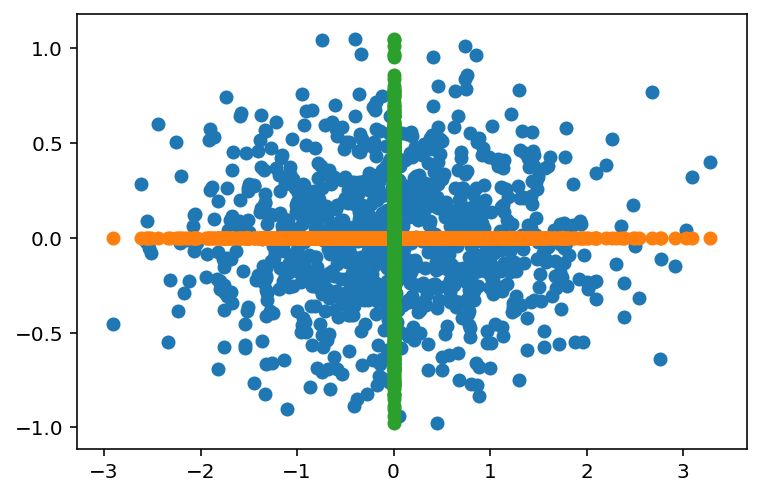

In [6]:
dataPCA1 = pd.DataFrame(data = pcaTr.transform(data), columns = ['PC1', 'PC2'])

plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.scatter(dataPCA.PC1, np.zeros(len(dataPCA.PC1)))
plt.scatter(np.zeros(len(dataPCA.PC2)), dataPCA.PC2)



## PCA as an strategy to plot complex data, as 2D or 3D points

One of my favoury uses of PCA is to create 2D or 3D charts out of very complex or highly dimensional data. We can find a very nice example in our cats/dogs classification where use use PCA to plot in a 2D chart the set of images used for classification. Remember that images are composed of pixels and each image is contains hundreds, thousans or millions of them. So, be able to map those complex objects in a 2D space is just awesome. Follow the link to view the example: [https://github.com/andcastillo/classification/blob/master/images/Classification.ipynb]

<img src = 'catdog.png'>


# PCA for deconvolution

It is very common in science and engenieering, that experimental measures contain the overlap of various independent components. A very simple and illustrative example is below

In [17]:
x = list(np.linspace(-math.pi, math.pi , num=256))

component1 = [math.exp(-(xi+1.2)*(xi+1.2)/0.1) for xi in x]
component2 = [math.exp(-(xi+2.3)*(xi+2.3)/0.1) + 0.5 * math.exp(-(xi-2.6)*(xi-2.6)/0.05)  for xi in x]#[math.exp(-(xi)*(xi)/0.2) for xi in x]#[math.exp(-(xi+2.2)*(xi+2.2)/0.15) + 0.5 * math.exp(-(xi-2.6)*(xi-2.6)/0.05)  for xi in x]
component3 = [math.exp(-(xi-1.2)*(xi-1.2)/0.2) for xi in x]

component1 = np.multiply(component1, 1/np.linalg.norm(component1))
component2 = np.multiply(component2, 1/np.linalg.norm(component2))
component3 = np.multiply(component3, 1/np.linalg.norm(component3))

concen1 = np.random.normal(0, math.sqrt(3), 10000)
concen2 = np.random.normal(0, math.sqrt(2), 10000)
concen3 = np.random.normal(0, math.sqrt(1), 10000)

#print(concen1)

overlap = [];
index = 0
for a in concen1:
    # Linear combination of component1 and component2
    overlap.append(list(np.multiply(component1, a) + np.multiply(component2, concen2[index]) + np.multiply(component3, concen3[index])))
    index = index + 1

#len(overlap)

## Determine components and concentrations using PCA

If we apply PCA to the data that we have build in the last step, we should get something like the components in the Eigen Vectors of the decomposition and something like the concetrations in the Eigen Values.

Text(0.5, 1.0, 'Explained variance is be std*std')

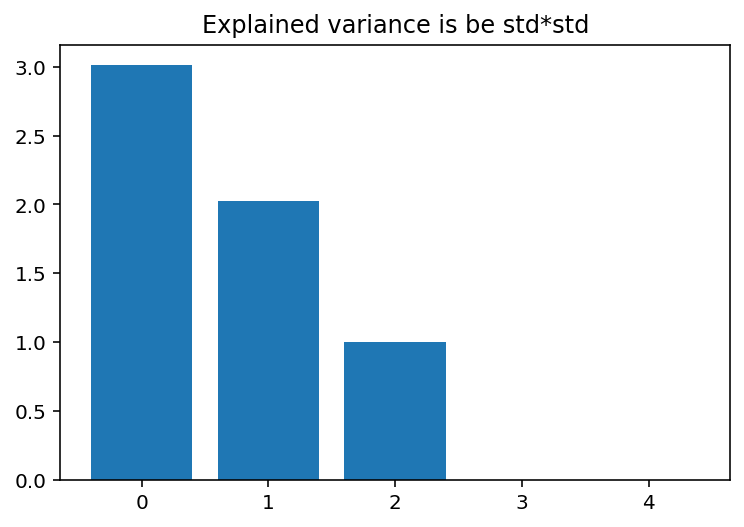

In [18]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# Fit on training set only.
#scaler.fit(overlap)
# Apply transform to both the training set and the test set.
#overlap = scaler.transform(overlap)
overlap = overlap - np.mean(overlap, axis=0)
nPCs = 5
pca = PCA(n_components = nPCs)
pcaTr = pca.fit(overlap)

#Plot the explained variance
plt.bar(list(range(0,nPCs)), pcaTr.explained_variance_)
plt.title("Explained variance is be std*std")
#print(pca.components_)

[3.00950433e+00 2.02796963e+00 1.00196717e+00 5.90609541e-34
 4.90750908e-34]


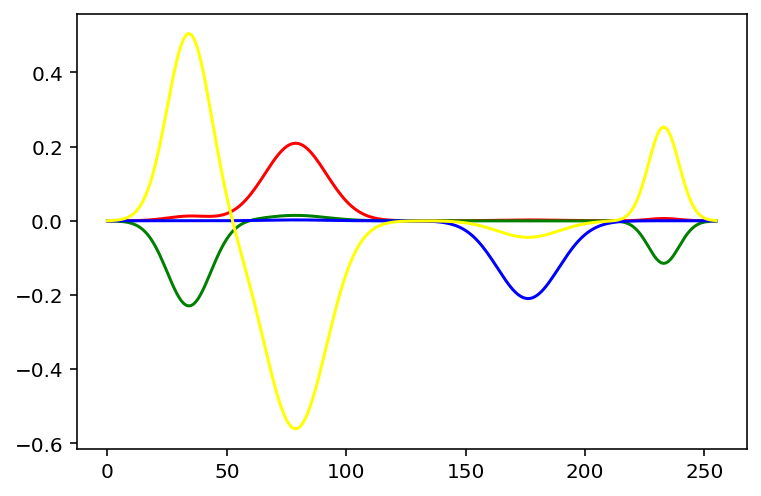

In [19]:
plt.plot(list(range(0,len(pcaTr.components_[0]))),pcaTr.components_[0], "k-", color='red' )
plt.plot(list(range(0,len(pcaTr.components_[0]))),pcaTr.components_[1], "k-", color='green' )
plt.plot(list(range(0,len(pcaTr.components_[0]))),pcaTr.components_[2], "k-", color='blue' )

plt.plot(list(range(0,len(pcaTr.components_[0]))), np.multiply(overlap[5], 1) , "k-", color='yellow' )

print(pcaTr.explained_variance_)

Let's compare the known concentrations of each component with the ones given by the PCA model

Real concentrations:  [2.6244526607931227, -0.638833090477412, 0.705379412766762]
PCA loadings:         [ 2.56716105  0.78029481 -0.65940947]


Text(0.5, 1.0, 'Real vs predicted concentrations')

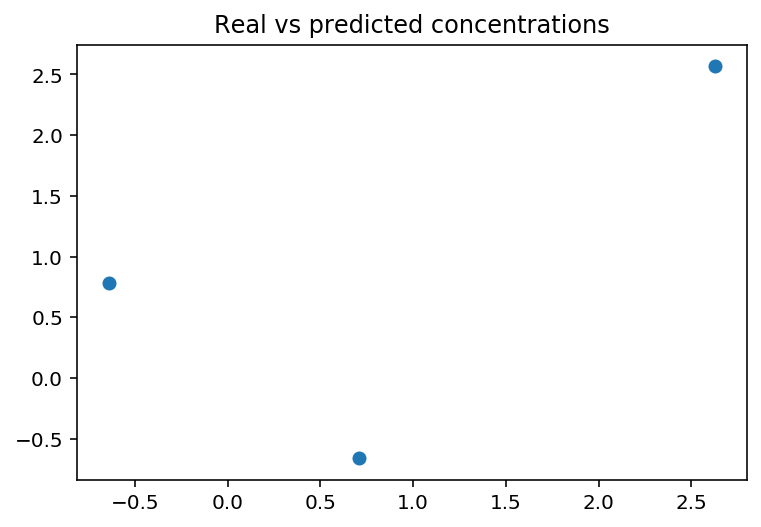

In [21]:
index = 60
print("Real concentrations: ", [concen1[index], concen2[index], concen3[index]])

foo = pcaTr.transform([overlap[index]])
print("PCA loadings:        ", foo[0,0:3])

plt.scatter([concen1[index], concen2[index], concen3[index]], foo[0,0:3])
plt.title("Real vs predicted concentrations")


array([ 2.01770064, -0.74271257])